In [15]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
from importlib import reload
import shlex
import medvqa
from medvqa.train_visual_module import debug_main

In [5]:
reload(medvqa.datasets.image_processing)
reload(medvqa.datasets.dataloading_utils)
reload(medvqa.datasets.chexpert.chexpert_vision_dataset_management)
reload(medvqa.training.vision)
reload(medvqa.train_visual_module)

<module 'medvqa.train_visual_module' from '/home/pamessina/medvqa/medvqa/train_visual_module.py'>

In [6]:
output = debug_main(args=shlex.split(
    ' '.join([
        '--iuxray-preprocessed-data-filename "iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl"',
        '--mimiccxr-preprocessed-data-filename "mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl"',
        '--epochs 100',
        '--batches-per-epoch 200',
        '--batch-size 80',
        '--num-workers 6',
        '--lr-decay-patience 3',
        '--classify-orientation',
        '--classify-chexpert',
        '--iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220607_231729.pkl"',
        '--mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220607_231820.pkl"',
        '--classify-questions',
        '--n-questions 97',
        '--iuxray-question-labels-filename "question_labels_per_report__20220607_225035.pkl"',
        '--mimiccxr-question-labels-filename "question_labels_per_report__20220607_225036.pkl"',
        '--imagenet-pretrained',
        '--img-aug-mode "random-spatial"',
        '--use-amp',
        '--no-save',
    ])
))

script's arguments:
   epochs: 100
   batches_per_epoch: 200
   checkpoint_folder: None
   iuxray_preprocessed_data_filename: iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl
   mimiccxr_preprocessed_data_filename: mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl
   image_local_feat_size: 1024
   imagenet_pretrained: True
   densenet_pretrained_weights_path: None
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 3
   batch_size: 80
   num_workers: 6
   device: GPU
   img_aug_mode: random-spatial
   mimiccxr_weight: 1.0
   chexpert_weight: 0.8
   iuxray_weight: 0.08
   use_amp: True
   pretrained_checkpoint_folder_path: None
   one_question_per_batch: False
   save: False
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   train_chexpert: True
   classify_tags: False
   n_medical_tags: None
   iuxray_rid2tags_filename: None
   mimiccxr_rid2tags_filename: None
   classify_orientation: True
   classify_chexpert: True
   iuxray_ch

In [7]:
output.keys()

dict_keys(['chexpert_vision_trainer', 'mimiccxr_vision_trainer', 'iuxray_vision_trainer'])

In [11]:
from collections import Counter

In [12]:
for x in output['chexpert_vision_trainer'].dataset.labels:
    print(x)
    break

[1 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [19]:
for i in range(14):
    print(Counter(output['iuxray_vision_trainer'].train_dataset[j]['chexpert'][i] for j in range(300)))

Counter({0: 254, 1: 46})
Counter({0: 261, 1: 39})
Counter({0: 226, 1: 74})
Counter({0: 265, 1: 35})
Counter({0: 203, 1: 97})
Counter({0: 272, 1: 28})
Counter({0: 295, 1: 5})
Counter({0: 287, 1: 13})
Counter({0: 245, 1: 55})
Counter({0: 285, 1: 15})
Counter({0: 257, 1: 43})
Counter({0: 286, 1: 14})
Counter({0: 282, 1: 18})
Counter({0: 269, 1: 31})


In [13]:
for i in range(14):
    print(Counter(x[i] for x in output['chexpert_vision_trainer'].dataset.labels))

Counter({0: 201216, 1: 22414})
Counter({0: 200321, 1: 23309})
Counter({0: 188479, 1: 35151})
Counter({0: 212955, 1: 10675})
Counter({0: 112329, 1: 111301})
Counter({0: 158356, 1: 65274})
Counter({0: 181074, 1: 42556})
Counter({0: 198815, 1: 24815})
Counter({0: 156439, 1: 67191})
Counter({0: 201029, 1: 22601})
Counter({0: 125755, 1: 97875})
Counter({0: 217456, 1: 6174})
Counter({0: 213950, 1: 9680})
Counter({1: 117184, 0: 106446})


In [7]:
!python ../train_visual_module.py \
        --iuxray-preprocessed-data-filename "iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl" \
        --mimiccxr-preprocessed-data-filename "mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl" \
        --epochs 130 \
        --batches-per-epoch 300 \
        --batch-size 80 \
        --num-workers 7 \
        --lr-decay-patience 3 \
        --classify-orientation \
        --classify-chexpert \
        --iuxray-chexpert-labels-filename "chexpert_labels_per_report__20220607_231729.pkl" \
        --mimiccxr-chexpert-labels-filename "chexpert_labels_per_report__20220607_231820.pkl" \
        --classify-questions \
        --n-questions 97 \
        --iuxray-question-labels-filename "question_labels_per_report__20220607_225035.pkl" \
        --mimiccxr-question-labels-filename "question_labels_per_report__20220607_225036.pkl" \
        --imagenet-pretrained \
        --img-aug-mode "random-spatial" \
        --binary-loss-name 'wbce-c' \
        --save

script's arguments:
   epochs: 130
   batches_per_epoch: 300
   checkpoint_folder: None
   iuxray_preprocessed_data_filename: iuxray_preprocessed_train_data__(hash=247,1338506350569278595).pkl
   mimiccxr_preprocessed_data_filename: mimiccxr_preprocessed_train_data__(hash=292,4086290602689741595).pkl
   image_local_feat_size: 1024
   imagenet_pretrained: True
   densenet_pretrained_weights_path: None
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 3
   batch_size: 80
   num_workers: 7
   device: GPU
   img_aug_mode: random-spatial
   mimiccxr_weight: 1.0
   chexpert_weight: 0.8
   iuxray_weight: 0.08
   use_amp: False
   pretrained_checkpoint_folder_path: None
   one_question_per_batch: False
   save: True
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   train_chexpert: True
   binary_loss_name: wbce-c
   classify_tags: False
   n_medical_tags: None
   iuxray_rid2tags_filename: None
   mimiccxr_rid2tags_filename: None
   classify_orientation: True
   classify

oracc 0.99700, chxlmicf1 0.44671, chxlmacf1 0.40882, chxlacc 0.68629, chxlrocauc 0.73205, qlf1 0.34879, 3.67 secs
---- Epoch 11/130
(1) Training stage (lr = 0.001000) ...
loss 0.38740, orien_loss 0.00492, oracc 0.99359, chx_loss 0.17473, chxlmicf1 0.46920, chxlmacf1 0.40622, chxlacc 0.67674, chxlrocauc 0.74790, ql_loss 0.10408, qlf1 0.35494, gloss 0.14403, gacc 0.94485, 108.80 secs
(2) Validation stage ...
oracc 0.99550, chxlmicf1 0.44211, chxlmacf1 0.38410, chxlacc 0.70087, chxlrocauc 0.74204, qlf1 0.36424, 3.70 secs
---- Epoch 12/130
(1) Training stage (lr = 0.001000) ...
loss 0.28596, orien_loss 0.00227, oracc 0.99380, chx_loss 0.18587, chxlmicf1 0.47119, chxlmacf1 0.41082, chxlacc 0.67443, chxlrocauc 0.74954, ql_loss 0.10420, qlf1 0.35583, gloss 0.11665, gacc 0.95577, 109.07 secs
(2) Validation stage ...
oracc 0.97451, chxlmicf1 0.41649, chxlmacf1 0.38349, chxlacc 0.69544, chxlrocauc 0.72961, qlf1 0.35909, 3.77 secs
---- Epoch 13/130
(1) Training stage (lr = 0.001000) ...
loss 0.23

oracc 0.99700, chxlmicf1 0.46518, chxlmacf1 0.43259, chxlacc 0.70407, chxlrocauc 0.74162, qlf1 0.39777, 3.98 secs
---- Epoch 31/130
(1) Training stage (lr = 0.000578) ...
loss 0.27664, orien_loss 0.01002, oracc 0.99493, chx_loss 0.17031, chxlmicf1 0.49468, chxlmacf1 0.43331, chxlacc 0.69463, chxlrocauc 0.77640, ql_loss 0.09514, qlf1 0.39170, gloss 0.06894, gacc 0.97510, 109.21 secs
(2) Validation stage ...
oracc 1.00000, chxlmicf1 0.47704, chxlmacf1 0.41053, chxlacc 0.73089, chxlrocauc 0.75688, qlf1 0.37125, 3.68 secs
---- Epoch 32/130
(1) Training stage (lr = 0.000578) ...
loss 0.24082, orien_loss 0.03085, oracc 0.99547, chx_loss 0.17964, chxlmicf1 0.50093, chxlmacf1 0.43390, chxlacc 0.70238, chxlrocauc 0.77957, ql_loss 0.09528, qlf1 0.38868, gloss 0.08375, gacc 0.96889, 108.91 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.48919, chxlmacf1 0.42522, chxlacc 0.73345, chxlrocauc 0.76176, qlf1 0.41114, 3.71 secs
---- Epoch 33/130
(1) Training stage (lr = 0.000578) ...
loss 0.27

oracc 0.99550, chxlmicf1 0.49761, chxlmacf1 0.42847, chxlacc 0.74228, chxlrocauc 0.77376, qlf1 0.38886, 3.77 secs
---- Epoch 51/130
(1) Training stage (lr = 0.000334) ...
loss 0.23584, orien_loss 0.04317, oracc 0.99594, chx_loss 0.15565, chxlmicf1 0.51624, chxlmacf1 0.44962, chxlacc 0.71436, chxlrocauc 0.79555, ql_loss 0.09227, qlf1 0.41216, gloss 0.04679, gacc 0.98282, 109.12 secs
(2) Validation stage ...
oracc 1.00000, chxlmicf1 0.48795, chxlmacf1 0.44036, chxlacc 0.74441, chxlrocauc 0.76205, qlf1 0.40256, 3.69 secs
---- Epoch 52/130
(1) Training stage (lr = 0.000334) ...
loss 0.22816, orien_loss 0.00053, oracc 0.99606, chx_loss 0.13783, chxlmicf1 0.51772, chxlmacf1 0.45096, chxlacc 0.71466, chxlrocauc 0.79578, ql_loss 0.09131, qlf1 0.40628, gloss 0.04187, gacc 0.98413, 109.21 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.51339, chxlmacf1 0.43460, chxlacc 0.76006, chxlrocauc 0.78448, qlf1 0.40355, 3.74 secs
Epoch    52: reducing learning rate of group 0 to 2.5355e-04.
----

oracc 0.99550, chxlmicf1 0.50621, chxlmacf1 0.44518, chxlacc 0.73770, chxlrocauc 0.77969, qlf1 0.41485, 3.69 secs
---- Epoch 71/130
(1) Training stage (lr = 0.000193) ...
loss 0.23291, orien_loss 0.00058, oracc 0.99694, chx_loss 0.14476, chxlmicf1 0.52883, chxlmacf1 0.46314, chxlacc 0.72469, chxlrocauc 0.80706, ql_loss 0.08962, qlf1 0.42201, gloss 0.02608, gacc 0.99106, 109.27 secs
(2) Validation stage ...
oracc 1.00000, chxlmicf1 0.49511, chxlmacf1 0.45379, chxlacc 0.72536, chxlrocauc 0.77080, qlf1 0.42133, 3.74 secs
---- Epoch 72/130
(1) Training stage (lr = 0.000193) ...
loss 0.20869, orien_loss 0.00600, oracc 0.99686, chx_loss 0.17016, chxlmicf1 0.53511, chxlmacf1 0.46488, chxlacc 0.73021, chxlrocauc 0.81049, ql_loss 0.09009, qlf1 0.42410, gloss 0.03183, gacc 0.98798, 109.05 secs
(2) Validation stage ...
oracc 1.00000, chxlmicf1 0.48091, chxlmacf1 0.42824, chxlacc 0.73802, chxlrocauc 0.75789, qlf1 0.42790, 3.66 secs
---- Epoch 73/130
(1) Training stage (lr = 0.000193) ...
loss 0.25

oracc 1.00000, chxlmicf1 0.50954, chxlmacf1 0.45650, chxlacc 0.74281, chxlrocauc 0.78094, qlf1 0.41894, 3.80 secs
---- Epoch 91/130
(1) Training stage (lr = 0.000111) ...
loss 0.23665, orien_loss 0.00079, oracc 0.99723, chx_loss 0.15202, chxlmicf1 0.54482, chxlmacf1 0.47546, chxlacc 0.73868, chxlrocauc 0.81902, ql_loss 0.08785, qlf1 0.42848, gloss 0.01856, gacc 0.99394, 109.18 secs
(2) Validation stage ...
oracc 1.00000, chxlmicf1 0.49627, chxlmacf1 0.45151, chxlacc 0.73377, chxlrocauc 0.77172, qlf1 0.41767, 3.60 secs
---- Epoch 92/130
(1) Training stage (lr = 0.000111) ...
loss 0.13978, orien_loss 0.00060, oracc 0.99602, chx_loss 0.06893, chxlmicf1 0.54221, chxlmacf1 0.47496, chxlacc 0.73542, chxlrocauc 0.81715, ql_loss 0.08832, qlf1 0.42744, gloss 0.01544, gacc 0.99481, 109.32 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.51393, chxlmacf1 0.45189, chxlacc 0.74931, chxlrocauc 0.78498, qlf1 0.41944, 3.70 secs
---- Epoch 93/130
(1) Training stage (lr = 0.000111) ...
loss 0.24

oracc 0.99850, chxlmicf1 0.51357, chxlmacf1 0.45026, chxlacc 0.75963, chxlrocauc 0.78276, qlf1 0.42082, 3.65 secs
Epoch   110: reducing learning rate of group 0 to 6.4289e-05.
---- Epoch 111/130
(1) Training stage (lr = 0.000064) ...
loss 0.23288, orien_loss 0.04297, oracc 0.99749, chx_loss 0.15203, chxlmicf1 0.55555, chxlmacf1 0.48255, chxlacc 0.74913, chxlrocauc 0.82878, ql_loss 0.08697, qlf1 0.43755, gloss 0.01567, gacc 0.99504, 109.14 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.50352, chxlmacf1 0.45267, chxlacc 0.73760, chxlrocauc 0.78059, qlf1 0.42652, 3.77 secs
---- Epoch 112/130
(1) Training stage (lr = 0.000064) ...
loss 0.26099, orien_loss 0.00100, oracc 0.99811, chx_loss 0.15909, chxlmicf1 0.55057, chxlmacf1 0.48162, chxlacc 0.74035, chxlrocauc 0.82482, ql_loss 0.08723, qlf1 0.43876, gloss 0.01388, gacc 0.99635, 109.22 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.51213, chxlmacf1 0.45800, chxlacc 0.75176, chxlrocauc 0.77957, qlf1 0.41753, 3.63 secs
--

loss 0.20081, orien_loss 0.03872, oracc 0.99757, chx_loss 0.15690, chxlmicf1 0.56267, chxlmacf1 0.49089, chxlacc 0.75436, chxlrocauc 0.83565, ql_loss 0.08603, qlf1 0.44217, gloss 0.01319, gacc 0.99656, 109.65 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.51338, chxlmacf1 0.45553, chxlacc 0.75037, chxlrocauc 0.78289, qlf1 0.42247, 3.82 secs


In [12]:
!python ../train_visual_module.py \
        --checkpoint-folder "models/visual_module/20220613_180648_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1" \
        --epochs 60 \
        --batches-per-epoch 300 \
        --batch-size 90 \
        --num-workers 7 \
        --save

script's arguments:
   epochs: 60
   batches_per_epoch: 300
   checkpoint_folder: models/visual_module/20220613_180648_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1
   iuxray_preprocessed_data_filename: None
   mimiccxr_preprocessed_data_filename: None
   image_local_feat_size: 1024
   imagenet_pretrained: False
   densenet_pretrained_weights_path: None
   lr: 0.001
   lr_decay: 0.76
   lr_decay_patience: 2
   batch_size: 90
   num_workers: 7
   device: GPU
   img_aug_mode: None
   mimiccxr_weight: 1.0
   chexpert_weight: 0.8
   iuxray_weight: 0.08
   use_amp: False
   pretrained_checkpoint_folder_path: None
   one_question_per_batch: False
   save: True
   override_lr: False
   train_mimiccxr: True
   train_iuxray: True
   train_chexpert: True
   binary_loss_name: bce
   classify_tags: False
   n_medical_tags: None
   iuxray_rid2tags_filename: None
   mimiccxr_rid2tags_filen

loss 0.23795, orien_loss 0.00095, oracc 0.99814, chx_loss 0.15373, chxlmicf1 0.55440, chxlmacf1 0.48647, chxlacc 0.74425, chxlrocauc 0.82985, ql_loss 0.08117, qlf1 0.41299, gloss 0.00995, gacc 0.99658, 121.91 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.50866, chxlmacf1 0.46227, chxlacc 0.74026, chxlrocauc 0.78408, qlf1 0.38821, 4.20 secs
---- Epoch 138/187
(1) Training stage (lr = 0.000016) ...
loss 0.16532, orien_loss 0.00329, oracc 0.99792, chx_loss 0.15240, chxlmicf1 0.55358, chxlmacf1 0.48674, chxlacc 0.74282, chxlrocauc 0.82913, ql_loss 0.08117, qlf1 0.40911, gloss 0.01271, gacc 0.99567, 121.85 secs
(2) Validation stage ...
oracc 0.99850, chxlmicf1 0.50762, chxlmacf1 0.45947, chxlacc 0.74207, chxlrocauc 0.77876, qlf1 0.39082, 4.18 secs
---- Epoch 139/187
(1) Training stage (lr = 0.000016) ...
loss 0.23271, orien_loss 0.00021, oracc 0.99743, chx_loss 0.14868, chxlmicf1 0.55509, chxlmacf1 0.48834, chxlacc 0.74438, chxlrocauc 0.83004, ql_loss 0.08107, qlf1 0.40839, gloss

### Training-Validation plots

In [13]:
from medvqa.evaluation.plots import plot_train_val_curves
from medvqa.utils.constants import MetricNames

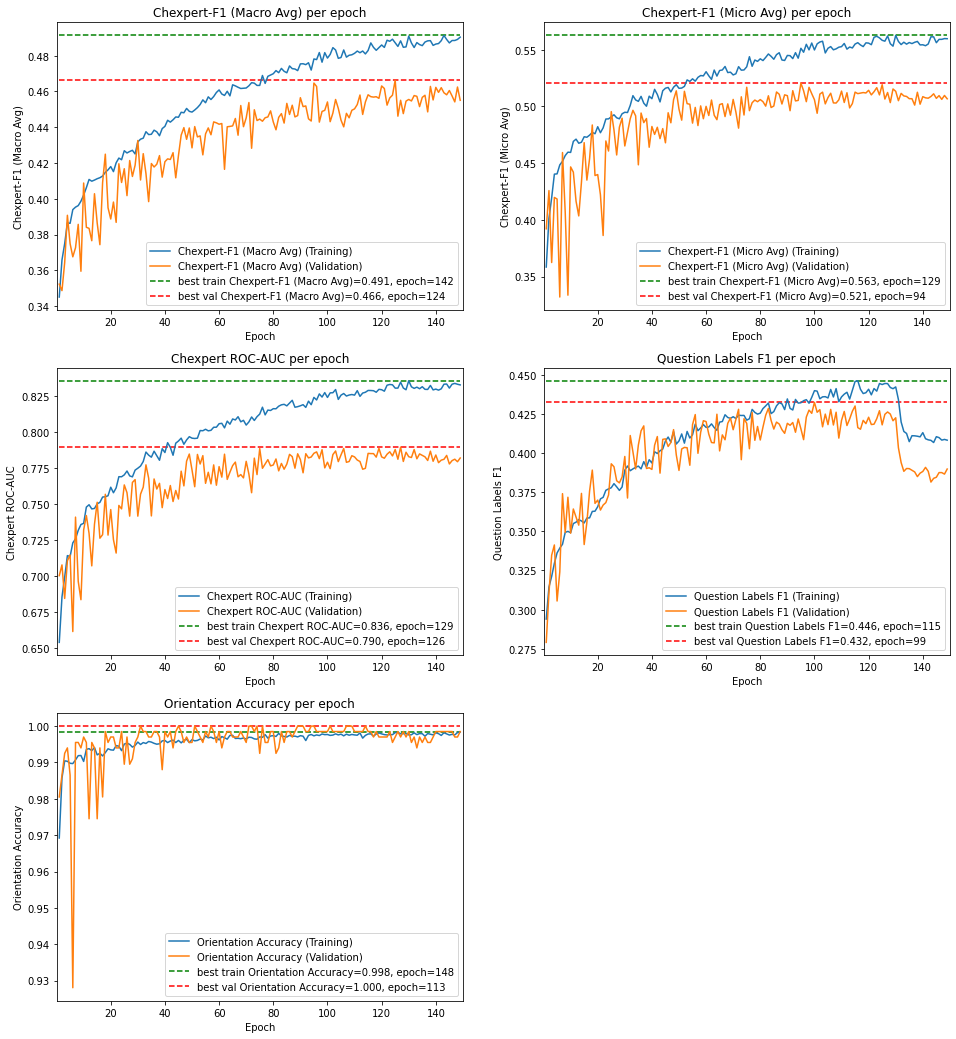

In [16]:
plot_train_val_curves('/home/pamessina/medvqa-workspace/models/visual_module/20220613_180648_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1/metrics_logs.csv',
                 [MetricNames.CHXLABELMACROAVGF1, MetricNames.CHXLABELMICROAVGF1,
                  MetricNames.CHXLABEL_ROCAUC, MetricNames.QLABELSF1, MetricNames.ORIENACC],
                 ['Chexpert-F1 (Macro Avg)', 'Chexpert-F1 (Micro Avg)', 'Chexpert ROC-AUC', 'Question Labels F1',
                  'Orientation Accuracy'],
                 single_plot_figsize=(8,6))

# Test Set Evaluation

In [17]:
!python ../eval_visual_module.py \
        --checkpoint-folder "models/visual_module/20220613_180648_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1" \
        --mimiccxr-preprocessed-test-data-filename "mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl" \
        --batch-size 160

script's arguments:
   checkpoint_folder: models/visual_module/20220613_180648_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1
   mimiccxr_preprocessed_test_data_filename: mimiccxr_preprocessed_test_data__(dataset=qa_adapted_reports__20220416_083114.json;tokenizer=5251,42509,2730556597987494786).pkl
   batch_size: 160
   device: GPU
   num_workers: 0
   eval_iuxray: True
   eval_mimiccxr: True
   use_amp: False
----- Evaluating model ------
metadata loaded from /home/pamessina/medvqa-workspace/models/visual_module/20220613_180648_mimiccxr+iuxray+chexpert_densenet121_model-args=(densenet-121,1024)_cnn-pretr=0_dataset_weights=1.0,0.08,0.8_img-aug=random-spatial_tags=0_orien=1_chx=1_ql=1/metadata.json
1) device = cuda
2) Creating instance of DensenetVisualModule model ...
DenseNet121's pretrained weights loaded from ImageNet
3) Creating evaluator engine ...
4) Defining image trans